In [1]:
import numpy as np
  
def rk4(f, t0, x0, tfinal, n,return_dx=False):  
    """  
    四阶龙格-库塔法求解微分方程  
    :param f: 微分方程的函数  
    :param x0: 初始x值  
    :param y0: 初始y值  
    :param xf: 终止x值  
    :param n: 分割成n个区间  
    :return: x和y的列表  
    """  
    x = [t0]  
    y = [x0]
    dy = [f(t0, x0)]
    h = (tfinal - t0) / n  
  
    for i in range(n):  
        k1 = h * f(x[i], y[i])  
        k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1)  
        k3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k2)  
        k4 = h * f(x[i] + h, y[i] + k3)  
          
        y_next = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6  
        x.append(x[i] + h)  
        y.append(y_next)  
        dy.append(f(x[-1],y[-1]))
    if return_dx:
        return x, y, dy
    return x, y

In [2]:
import matplotlib.pyplot as plt

## 状态相关增益位置反馈

$$
\ddot{x}=-x-\dot{x}+\frac{1}{x}
$$

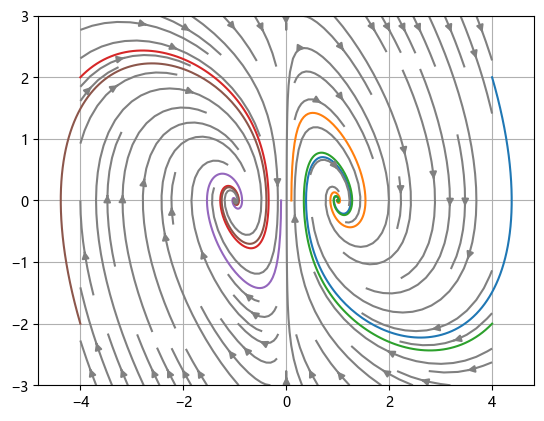

In [3]:
def f(t, x):  
    """ 定义微分方程 dy/dx = f(x, y) = x + y """  
    return np.array([x[1],-x[0]+1/x[0]-x[1]])

plt.figure()
# 调用RK4方法  
for x0 in [[4,2],[0.1,0],[4,-2],[-4,2],[-0.1,0],[-4,-2]]:
    x0 = np.array(x0)
    n = 1000  # 可以调整n以观察不同步长下的结果  
    t, x = rk4(f, 0, x0, 30, n)  
    x=np.array(x)
    plt.plot(x[:,0],x[:,1])
X,Y=np.meshgrid(np.linspace(-4,4,1000),np.linspace(-3,3,400))
dX,dY=np.zeros_like(X),np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        d=f(0,np.array([X[i,j],Y[i,j]]))
        dX[i,j]=d[0]
        dY[i,j]=d[1]
plt.streamplot(X,Y,dX,dY,density=0.9,color="gray")
plt.grid()
plt.show()

## 时变增益位置反馈

$$
\ddot{x}=-\sin(t)x-\dot{x}
$$

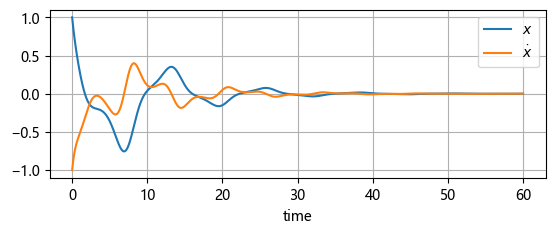

In [4]:
def f(t, x):  
    """ 定义微分方程 dy/dx = f(x, y) = x + y """  
    return np.array([x[1],-(np.sin(t))*x[0]-x[1]])
# 调用RK4方法  
x0 = np.array([4,0])
x, y = rk4(f, 0, x0, 30, n)  

plt.figure()
plt.subplot(2,1,1)
t,x=rk4(f,0,np.array([1,-1]),60,10000)
plt.plot(t,x)
plt.legend([r"$x$",r"$\dot{x}$"])
plt.grid()
plt.xlabel("time")
plt.show()

## 位置非连续鲁棒镇定

$$
\ddot{x}=-2\mathrm{sign}(x)-\dot{x}+\delta(t),\delta(t)\in[-1,1]
$$

选取$\delta(t)=t$并与twsting算法$\ddot{x}=-2\mathrm{sign}(x)-\mathrm{sign}(\dot{x})+\delta(t)$对比

 twist 算法  稳态[x,xdot]值 [6.83953788e-06 2.71394987e-04]
 半twsit算法  稳态[x,xdot]值 [ 8.54150654e-07 -2.39612583e-03]


<Figure size 640x480 with 0 Axes>

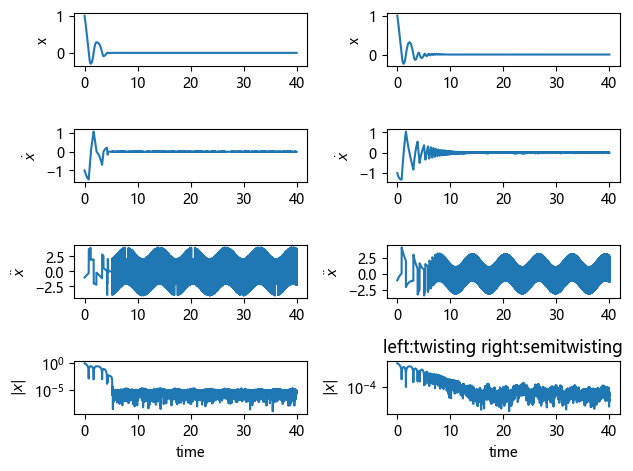

In [22]:
def twist(t, x):  
    """ twist 算法 """  
    return np.array([x[1],-2*np.sign(x[0])-np.sign(x[1])+np.sin(t)])

def semitwist(t, x):  
    """ 半twsit算法 """  
    return np.array([x[1],-2*np.sign(x[0])-x[1]+np.sin(t)])

plt.figure()
fig,axes=plt.subplots(4,2)
for col,f in enumerate([twist,semitwist]):
    # 调用RK4方法  
    x0 = np.array([4,0])
    t, x, dx = rk4(f,0,np.array([1,-1]),40,10000,return_dx=True)  
    x=np.array(x)
    dx=np.array(dx)
    label=[r"x",r"$\dot{x}$",r"$\ddot{x}$"]

    for i,data in enumerate([x[:,0],x[:,1],dx[:,1]]):
        axes[i,col].plot(t,data)
        axes[i,col].set_ylabel(label[i])
        plt.grid()
    axes[3,col].semilogy(t,np.abs(x[:,0]))
    axes[3,col].set_ylabel(r"$|x|$")
    axes[3,col].set_xlabel("time")
    print(f.__doc__,"稳态[x,xdot]值",x[-1,:])
plt.sttitle("left:twisting right:semitwisting")
plt.tight_layout() 
plt.show()

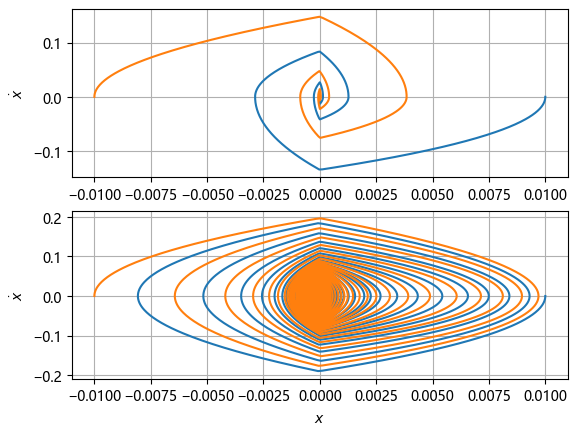

In [6]:
plt.figure()
for i,f in enumerate([twist,semitwist]):
    plt.subplot(2,1,i+1)
    for x0 in [[1e-2,0],[-1e-2,0]]:
        x0 = np.array(x0)
        t, x, dx = rk4(f,0,x0,10,10000,return_dx=True)  
        x=np.array(x)
        dx=np.array(dx)
        plt.plot(x[:,0],x[:,1])
    plt.xlabel(r"${x}$")
    plt.ylabel(r"$\dot{x}$")
    plt.grid()
plt.show()